In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor, MLPClassifier

# Non-linear regression

## Task 1 -- Data acquisition

30 10


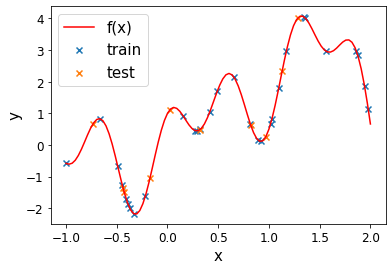

In [2]:
def f(x):
    return np.cos(10*x) + np.sin(5*x) + 1.5*x**2 + 0.5*x**3 - 0.7*x**4 + 1*x

npoints = 100
xall = np.linspace(-1, 2, npoints).reshape(-1, 1)
yall = f(xall).flatten()

rng = np.random.default_rng(seed=21)
x = []

ntotal = 40
for i in range(ntotal):
    x.append(3.0*rng.random() - 1.0)

x = np.array(x).reshape(-1,1)
y = f(x).flatten()
rs = ShuffleSplit(n_splits=1, test_size=.25, random_state=1)
for train,test in rs.split(x):
    print(len(train),len(test))


    plt.plot(xall,yall, c='red', label='f(x)')
    plt.scatter(x[train],y[train],marker='x', label='train')
    plt.scatter(x[test],y[test],marker='x', label='test')

    plt.legend(fontsize=15)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

## Task2 -- Support vector machine + linear kernel

Linear Kernel: $K(\mathbf{x},\mathbf{y}) = \mathbf{x} \cdot \mathbf{y}$



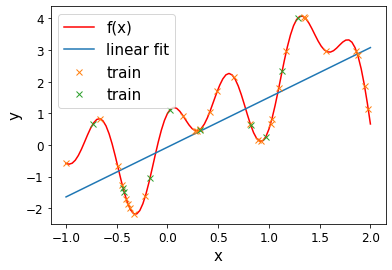

w1 (slope) = [[1.57218598]], w0 (intercept) = [-0.0679897]
R2 score =  0.50835
MSE test  =  1.26975     MAE test  =  0.95820
MSE train =  1.18569     MAE train =  0.90699


In [3]:
svr_lin = SVR(kernel="linear", C=100)

svr_lin.fit(x[train],y[train])
yall_lin = svr_lin.predict(xall)
y_lin = svr_lin.predict(x)


plt.plot(xall,yall, c='red', label='f(x)')
plt.plot(xall,yall_lin, label = 'linear fit')
plt.plot(x[train],y[train], 'x', label = 'train')
plt.plot(x[test],y[test], 'x', label = 'train')

plt.legend(fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#print(svr_lin.score(x[test],y[test]))
print(f'w1 (slope) = {svr_lin.coef_}, w0 (intercept) = {svr_lin.intercept_}')

r2 = r2_score(y[test],y_lin[test])
print(f'R2 score = {r2:8.5f}')

mse_test = mean_squared_error(y[test],y_lin[test])
mse_train = mean_squared_error(y[train],y_lin[train])

mae_test = mean_absolute_error(y[test],y_lin[test])
mae_train = mean_absolute_error(y[train],y_lin[train])

print(f'MSE test  = {mse_test:8.5f}     MAE test  = {mae_test:8.5f}')
print(f'MSE train = {mse_train:8.5f}     MAE train = {mae_train:8.5f}')

## Task 3 -- Support vector machine + Gaussian kernel

$\gamma=\frac{1}{2\sigma^2}$ is the precision of the gaussian kernel.

{'C': 100.0, 'gamma': 10.0}


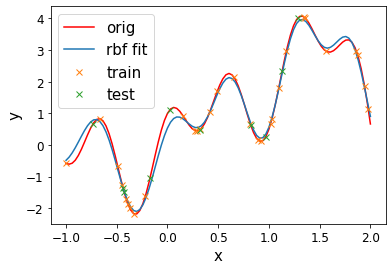

R2 score =  0.98856
MSE test  =  0.02955     MAE test  =  0.12300
MSE train =  0.00736     MAE train =  0.08108


In [4]:
svr = GridSearchCV(
    SVR(kernel="rbf"),scoring='neg_mean_squared_error',
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},
)


svr.fit(x[train],y[train]) 
yall_svr = svr.predict(xall)
y_svr = svr.predict(x)

print(svr.best_params_)

plt.plot(xall,yall, c='red', label='orig')
plt.plot(xall,yall_svr, label = 'rbf fit')
plt.plot(x[train],y[train], 'x', label = 'train')
plt.plot(x[test],y[test], 'x', label = 'test')

plt.legend(fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#print(svr.cv_results_)
#print(svr.best_score_)

r2 = r2_score(y[test],y_svr[test])
print(f'R2 score = {r2:8.5f}')

mse_test = mean_squared_error(y[test],y_svr[test])
mse_train = mean_squared_error(y[train],y_svr[train])

mae_test = mean_absolute_error(y[test],y_svr[test])
mae_train = mean_absolute_error(y[train],y_svr[train])

print(f'MSE test  = {mse_test:8.5f}     MAE test  = {mae_test:8.5f}')
print(f'MSE train = {mse_train:8.5f}     MAE train = {mae_train:8.5f}')

## Task 4 -- Neural network

How many nodes would you choose to properly represent the function?

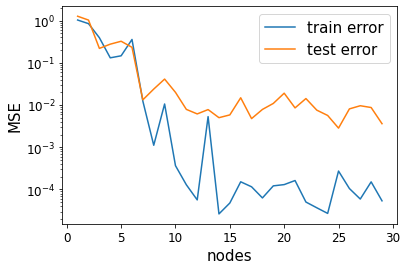

In [5]:
mse=[]
nn_param = []
nn_1hidden = []
for nodes in range(1,30):
    nn = MLPRegressor(hidden_layer_sizes=(nodes),activation='logistic', 
                      max_iter=6000,solver='lbfgs',warm_start='false')
    
    nn.fit(x[train],y[train])
    yall_nn = nn.predict(xall)
    y_nn = nn.predict(x)
    nn_param.append(nn.get_params())
    nn_1hidden.append(nn)

    #print(nn.n_iter_)

#     plt.plot(xall,yall, c='red', label='orig')
#     plt.plot(xall,yall_nn, label = 'nn fit')
#     plt.plot(x[train],y[train], 'x', label = 'train')

#     plt.legend(fontsize=15)
#     plt.xlabel('x', fontsize=15)
#     plt.ylabel('y', fontsize=15)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)
#     plt.show()

#    print(nn.score(x[test],y[test]))

    r2 = r2_score(y[test],y_nn[test])
#    print(f'R2 score = {r2:8.5f}')

    mse_test = mean_squared_error(y[test],y_nn[test])
    mse_train = mean_squared_error(y[train],y_nn[train])

    mae_test = mean_absolute_error(y[test],y_nn[test])
    mae_train = mean_absolute_error(y[train],y_nn[train])

#     print(f'MSE test  = {mse_test:8.5f}     MAE test  = {mae_test:8.5f}')
#     print(f'MSE train = {mse_train:8.5f}     MAE train = {mae_train:8.5f}')
    mse.append([mse_train,mse_test])
    
mse = np.array(mse)
nodes = np.arange(1,30)
plt.plot(nodes,mse[:,0], label='train error')
plt.plot(nodes,mse[:,1], label='test error')

plt.legend(fontsize=15)
plt.xlabel('nodes', fontsize=15)
plt.ylabel('MSE', fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

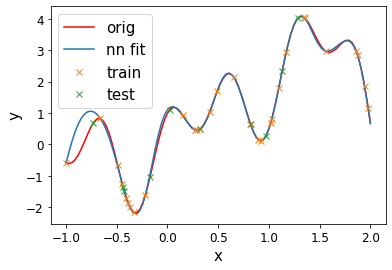

R2 score =  0.99423
MSE test  =  0.01490     MAE test  =  0.05983
MSE train =  0.00015     MAE train =  0.00948


In [6]:
yall_nn = nn_1hidden[15].predict(xall)
y_nn = nn_1hidden[15].predict(x)

plt.plot(xall,yall, c='red', label='orig')
plt.plot(xall,yall_nn, label = 'nn fit')
plt.plot(x[train],y[train], 'x', label = 'train')
plt.plot(x[test],y[test], 'x', label = 'test')

plt.legend(fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

r2 = r2_score(y[test],y_nn[test])
print(f'R2 score = {r2:8.5f}')

mse_test = mean_squared_error(y[test],y_nn[test])
mse_train = mean_squared_error(y[train],y_nn[train])

mae_test = mean_absolute_error(y[test],y_nn[test])
mae_train = mean_absolute_error(y[train],y_nn[train])

print(f'MSE test  = {mse_test:8.5f}     MAE test  = {mae_test:8.5f}')
print(f'MSE train = {mse_train:8.5f}     MAE train = {mae_train:8.5f}')

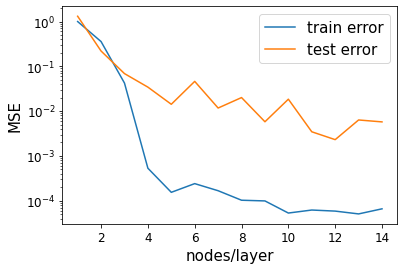

In [14]:
from numpy.random import seed
seed(10)

mse=[]
nn_2hidden = []
for nodes in range(1,15):
    nn = MLPRegressor(hidden_layer_sizes=(nodes,nodes),activation='logistic', 
                      max_iter=10000,solver='lbfgs',warm_start='false')
    
    nn.fit(x[train],y[train])
    yall_nn = nn.predict(xall)
    y_nn = nn.predict(x)
    
    nn_2hidden.append(nn)


    r2 = r2_score(y[test],y_nn[test])

    mse_test = mean_squared_error(y[test],y_nn[test])
    mse_train = mean_squared_error(y[train],y_nn[train])

    mae_test = mean_absolute_error(y[test],y_nn[test])
    mae_train = mean_absolute_error(y[train],y_nn[train])

    mse.append([mse_train,mse_test])
    
mse = np.array(mse)
nodes = np.arange(1,15)
plt.plot(nodes,mse[:,0], label='train error')
plt.plot(nodes,mse[:,1], label='test error')

plt.legend(fontsize=15)
plt.xlabel('nodes/layer', fontsize=15)
plt.ylabel('MSE', fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

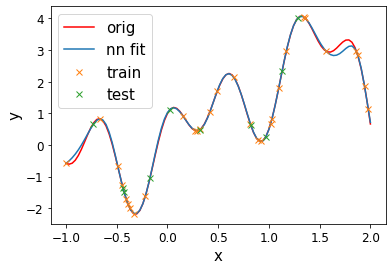

R2 score =  0.99992
MSE test  =  0.00019     MAE test  =  0.01115
MSE train =  0.00006     MAE train =  0.00665


In [11]:
yall_nn = nn_2hidden[5].predict(xall)
y_nn = nn_2hidden[5].predict(x)

plt.plot(xall,yall, c='red', label='orig')
plt.plot(xall,yall_nn, label = 'nn fit')
plt.plot(x[train],y[train], 'x', label = 'train')
plt.plot(x[test],y[test], 'x', label = 'test')

plt.legend(fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

r2 = r2_score(y[test],y_nn[test])
print(f'R2 score = {r2:8.5f}')

mse_test = mean_squared_error(y[test],y_nn[test])
mse_train = mean_squared_error(y[train],y_nn[train])

mae_test = mean_absolute_error(y[test],y_nn[test])
mae_train = mean_absolute_error(y[train],y_nn[train])

print(f'MSE test  = {mse_test:8.5f}     MAE test  = {mae_test:8.5f}')
print(f'MSE train = {mse_train:8.5f}     MAE train = {mae_train:8.5f}')

# Kernel function vs. feature map


$$
\Phi(\mathbf{x}) = \begin{pmatrix} x_1^2 \\ x_2^2 \\ c \\ \sqrt{2c}x_1 \\\sqrt{2c}x_2  \\ \sqrt{2} x_1 x_2  \end{pmatrix}
$$

# Classification

## Task 1 -- Generating the dataset

no. of TRAIN: 80
no. of TEST: 20




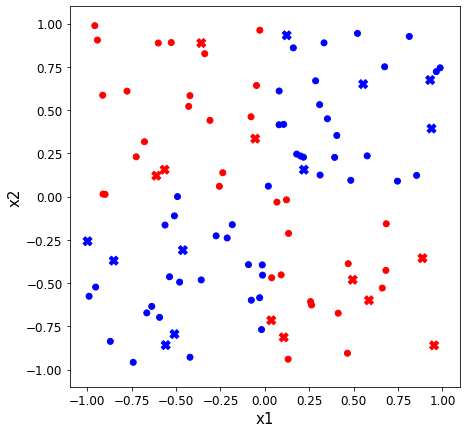

In [15]:
rng = np.random.default_rng(seed=29)
X = []
y = []
ntotal = 100
for i in range(ntotal):
    x = 2.0*rng.random(size=(2)) - 1.0
    if np.product(x) > 0.0:
        y.append(1.0)
    else:
        y.append(-1.0)
        
    X.append(x)
    
X = np.array(X)
y = np.array(y)

rs2 = ShuffleSplit(n_splits=1, test_size=.20, random_state=1)
for trainc, testc in rs2.split(X):
    print(f"no. of TRAIN: {len(trainc)}")
    print(f"no. of TEST: {len(testc)}")
    print('\n')

cm_bright = ListedColormap(["red", "blue"])
plt.rcParams["figure.figsize"] = (7,7)

plt.scatter(X[trainc,0],X[trainc,1],marker='o',c=y[trainc],cmap=cm_bright)
plt.scatter(X[testc,0],X[testc,1],s=80,marker='X',c=y[testc],cmap=cm_bright)
#plt.legend(fontsize=15)
plt.xlabel('x1', fontsize=15)
plt.ylabel('x2', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.axis([-1.1,1.1,-1.1,1.1])
plt.show()

## Task 2 -- Initial fitting

R2 score =  0.80000
MSE test  =  0.20000     MAE test  =  0.10000
MSE train =  0.10000     MAE train =  0.05000


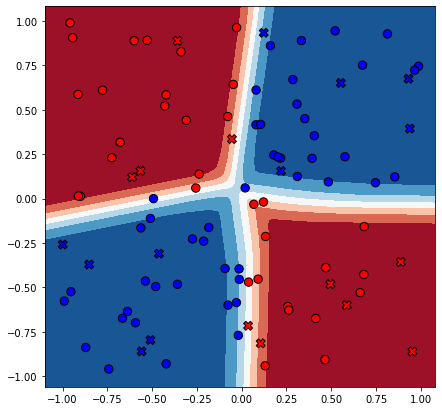

In [19]:

# NN classifier
clf = MLPClassifier(max_iter=5000)

clf.fit(X[trainc],y[trainc])

# mesh to show decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predicted probability to be in class B (z=1)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


#plot everything
ax = plt.subplot()
cm = plt.cm.RdBu

cs = ax.contourf(xx, yy, Z, cmap=cm, alpha=1.0)
#fig.colorbar(cs, ax=ax)
ax.scatter(X[trainc, 0], X[trainc, 1],s=70, marker='o',c=y[trainc], 
           cmap=cm_bright,edgecolor='black',linewidths=1)
ax.scatter(X[testc, 0], X[testc, 1],s=80, marker='X',c=y[testc], cmap=cm_bright, 
           edgecolor='black',linewidths=1)


y_proba = clf.predict_proba(X)
y_clf = clf.predict(X)

r2 = r2_score(y[testc],y_clf[testc])
print(f'R2 score = {r2:8.5f}')

mse_test = mean_squared_error(y[testc],y_clf[testc])
mse_train = mean_squared_error(y[trainc],y_clf[trainc])

mae_test = mean_absolute_error(y[testc],y_clf[testc])
mae_train = mean_absolute_error(y[trainc],y_clf[trainc])

print(f'MSE test  = {mse_test:8.5f}     MAE test  = {mae_test:8.5f}')
print(f'MSE train = {mse_train:8.5f}     MAE train = {mae_train:8.5f}')

## Task 3 -- Activation functions

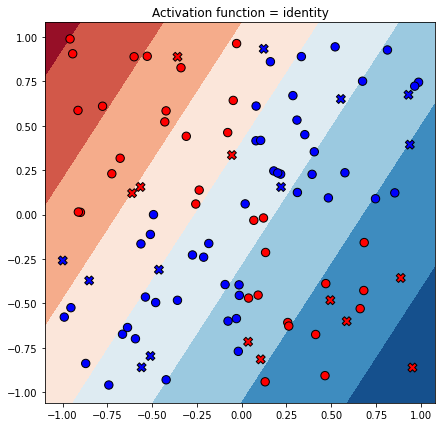

Activation function = identity
R2 score = -0.80000
MSE test  =  1.80000     MAE test  =  0.90000
MSE train =  1.00000     MAE train =  0.50000


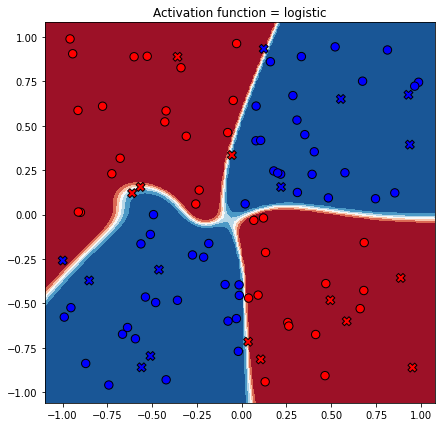

Activation function = logistic
R2 score =  0.20000
MSE test  =  0.80000     MAE test  =  0.40000
MSE train =  0.00000     MAE train =  0.00000


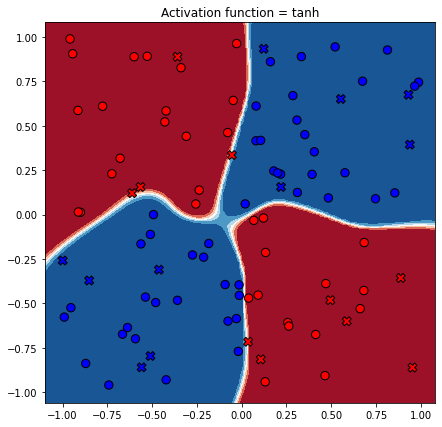

Activation function = tanh
R2 score =  0.80000
MSE test  =  0.20000     MAE test  =  0.10000
MSE train =  0.00000     MAE train =  0.00000


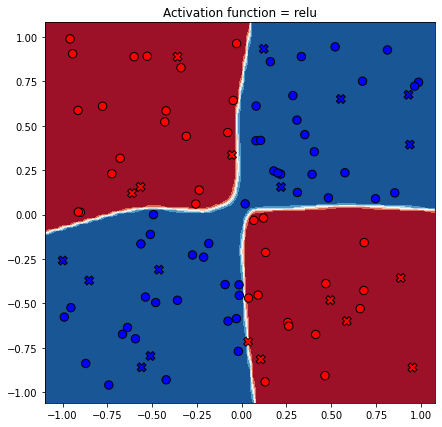

Activation function = relu
R2 score =  1.00000
MSE test  =  0.00000     MAE test  =  0.00000
MSE train =  0.00000     MAE train =  0.00000


In [20]:
for actif in 'identity', 'logistic', 'tanh', 'relu':
    # NN classifier
    clf = MLPClassifier(hidden_layer_sizes=(100),activation=actif,random_state=1, 
                    max_iter=5000,solver='lbfgs',warm_start='false',alpha=1e-4)

    clf.fit(X[trainc],y[trainc])

    # mesh to show decision boundary
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # predicted probability to be in class B (z=1)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)


    #plot everything
    ax = plt.subplot()
    cm = plt.cm.RdBu

    cs = ax.contourf(xx, yy, Z, cmap=cm, alpha=1.0)
    #fig.colorbar(cs, ax=ax)
    ax.scatter(X[trainc, 0], X[trainc, 1],s=70, marker='o',c=y[trainc], 
               cmap=cm_bright,edgecolor='black',linewidths=1)
    ax.scatter(X[testc, 0], X[testc, 1],s=80, marker='X',c=y[testc], cmap=cm_bright, 
               edgecolor='black',linewidths=1)
    ax.set_title('Activation function = ' + actif)
    plt.show()


    y_proba = clf.predict_proba(X)
    y_clf = clf.predict(X)

    r2 = r2_score(y[testc],y_clf[testc])
    print(f'Activation function = {actif}')
    print(f'R2 score = {r2:8.5f}')

    mse_test = mean_squared_error(y[testc],y_clf[testc])
    mse_train = mean_squared_error(y[trainc],y_clf[trainc])

    mae_test = mean_absolute_error(y[testc],y_clf[testc])
    mae_train = mean_absolute_error(y[trainc],y_clf[trainc])

    print(f'MSE test  = {mse_test:8.5f}     MAE test  = {mae_test:8.5f}')
    print(f'MSE train = {mse_train:8.5f}     MAE train = {mae_train:8.5f}')

## Task 4 -- Regularisation

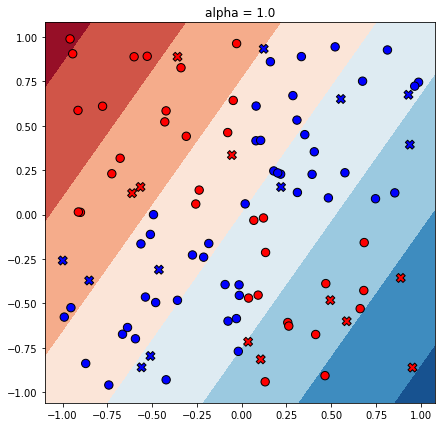

alpha = 1.0
R2 score = -1.00000
MSE test  =  2.00000     MAE test  =  1.00000
MSE train =  1.65000     MAE train =  0.82500


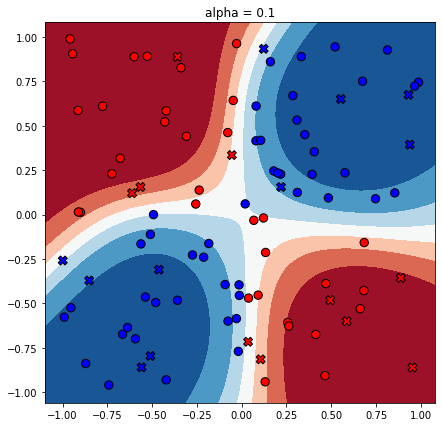

alpha = 0.1
R2 score =  0.80000
MSE test  =  0.20000     MAE test  =  0.10000
MSE train =  0.20000     MAE train =  0.10000


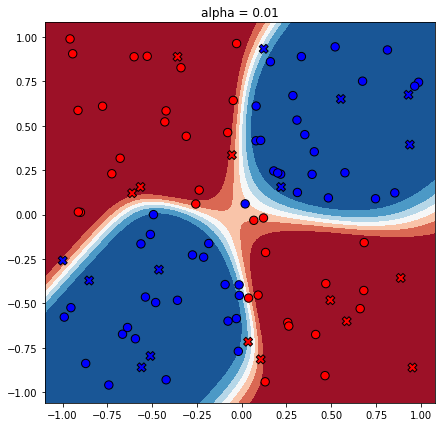

alpha = 0.01
R2 score =  0.60000
MSE test  =  0.40000     MAE test  =  0.20000
MSE train =  0.05000     MAE train =  0.02500


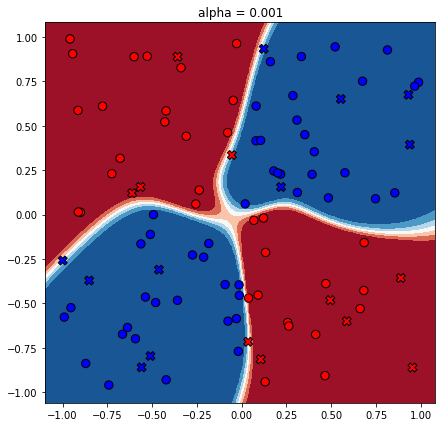

alpha = 0.001
R2 score =  0.60000
MSE test  =  0.40000     MAE test  =  0.20000
MSE train =  0.00000     MAE train =  0.00000


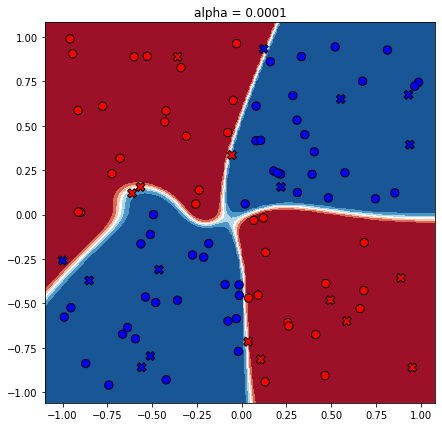

alpha = 0.0001
R2 score =  0.20000
MSE test  =  0.80000     MAE test  =  0.40000
MSE train =  0.00000     MAE train =  0.00000


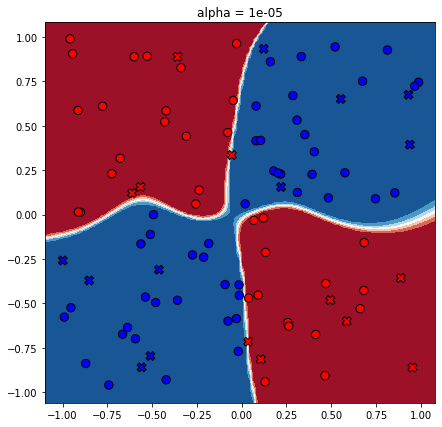

alpha = 1e-05
R2 score =  0.80000
MSE test  =  0.20000     MAE test  =  0.10000
MSE train =  0.00000     MAE train =  0.00000


In [23]:
for palpha in 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5:
    # NN classifier
    clf = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',random_state=1, 
                    max_iter=5000,solver='lbfgs',warm_start='false',alpha=palpha)

    clf.fit(X[trainc],y[trainc])

    # mesh to show decision boundary
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # predicted probability to be in class B (z=1)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)


    #plot everything
    ax = plt.subplot()
    cm = plt.cm.RdBu

    cs = ax.contourf(xx, yy, Z, cmap=cm, alpha=1.0)
    #fig.colorbar(cs, ax=ax)
    ax.scatter(X[trainc, 0], X[trainc, 1],s=70, marker='o',c=y[trainc], 
               cmap=cm_bright,edgecolor='black',linewidths=1)
    ax.scatter(X[testc, 0], X[testc, 1],s=80, marker='X',c=y[testc], cmap=cm_bright, 
               edgecolor='black',linewidths=1)
    ax.set_title('alpha = ' + str(palpha))
    plt.show()


    y_proba = clf.predict_proba(X)
    y_clf = clf.predict(X)

    r2 = r2_score(y[testc],y_clf[testc])
    print(f'alpha = {palpha}')
    print(f'R2 score = {r2:8.5f}')

    mse_test = mean_squared_error(y[testc],y_clf[testc])
    mse_train = mean_squared_error(y[trainc],y_clf[trainc])

    mae_test = mean_absolute_error(y[testc],y_clf[testc])
    mae_train = mean_absolute_error(y[trainc],y_clf[trainc])

    print(f'MSE test  = {mse_test:8.5f}     MAE test  = {mae_test:8.5f}')
    print(f'MSE train = {mse_train:8.5f}     MAE train = {mae_train:8.5f}')